In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns


In [ ]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


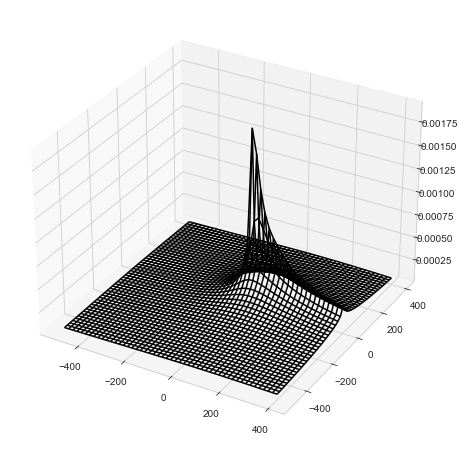

4.7294589070345527e-05
4.812296648054063e-05


In [14]:
num = 50
xv = np.linspace(-500,400,num)
yv = np.linspace(-500,400,num)

X,Y = np.meshgrid(xv,yv)


# frist X,Y


a = 8.2
intervalo  = 10
valor = 100
ke = 1/(4*np.pi*8.85418e-12)

V = np.zeros((num,num))
print(V)
# v = np.zeros((2,10)) 
kl = 1e-12

# x -> i
# y -> j
# x = a + intervalo/2 
i = j = 0
for xi in xv:
    for yj in yv:
        x = a + intervalo/2 
        for k in range(100):
            #print(k,x)
            # calcula o valor da carga do intevalor de linha
            Q = ( (kl*x) / ((x**2) + (a**2)) ) * intervalo  # pL * dx
            d = np.sqrt((x-xi)**2 + yj**2)
            if d<0.01:
                d == 0.01
            V[j][i] += ke*(Q/d)
            x = x + intervalo
        # print(i,j)    
        j += 1        
    i += 1 
    j = 0     
    
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, V, color='black')  
plt.show()

print(V[0][0])
print(V[0][1])


In [16]:
num = 50
xv = np.linspace(-500,400,num)
yv = np.linspace(-500,400,num)


i = j = 0
for xi in xv:
       
    i += 1    
print(i)

print("50 ou", (900/50))

50
50 ou %d 18.0


In [ ]:
%% Descobrir o E1 - Campo eletrico dentro do cilindro
%tem que ser por gauss pq é um fio infinito
 

%% Variaveis Dadas
clc
clear all
close all

%% variaveis do problema
e0 = 8.854*10^-12;
kc = 8.8*10^-12;
a = 10;

const=1/(4*pi*e0);  %Constante

%% Variaveis Criadas

passe = 1;
limites = 20;
%Onde o campo sera medido:
x= -limites:passe:limites; %vetor na coordenada x onde será calculado E
y= -limites:passe:limites;  %vetor na coordenada z onde será calculado E
z= -limites:passe:limites; %vetor na coordenada z onde será calculado E

%Gerador do campo:
xl= a:passe:(5*limites); % variação da coordenada x onde está a carga 
% yl= -passe:passe:passe; % variação da coordenada y onde está a carga 

dL = passe; %tamanho de cada segmento

%inicializa o campo elétrico:
V(:,:,:) = zeros (length(x),length(y),length(z)); 

%% Desenvolvimento
for i = 1:length(x)% varre a coordenada x onde E será calculado
    disp(i)
    for j = 1: length(y)  % varre a coordenada y onde E será calculado
         for k = 1: length(z)  % varre a coordenada z onde E será calculado

            for m = 1:length(xl)  % varre a coordenada x da carga
%                  #for n = 1:length(yl)  % varre a coordenada y da carga
                        
                        r = [x(i),y(j),z(k)]; %vetor posição apontando para onde estamos calculando E
                        rl= [xl(m),0,0];% vetor posição apontando para a carga

                        if ((r-rl)*(r-rl)'>0.00000001)
                            V(i,j,k) = V(i,j,k)  + const*((((kc.*xl(m))/(xl(m).^2 + a^2)).*dL)/(sqrt((r-rl)*(r-rl)'))');

                            Q = ke/sqrt((x-xi)**2 + yj**2)*( (kl*x) / ((x**2) + (a**2)) ) * intervalo  # pL * dx
           
                        end       
                 
%                 # end       
                 
            end
        end
    end
end
%% Grafico
% xd = linspace(-limites,limites);
% yd = linspace(-limites,limites);
% zd = linspace(-limites,limites);
% [X,Y] = meshgrid(xd,yd);
% 
% figure(1)
% surf(x,y,V(:,:,0));
% xlabel('x')
% ylabel('y')
% zlabel('z')
% axis([-5 20 -20 20 -inf inf])
% grid on
% colormap(jet(20))
% colorbar
%% prof
[X,Z] = meshgrid(x,z);
figure
[C,h] =  contour(x,z,squeeze(V(:,3,:)),20);%faz o gráfico das curvas de nível para o potencial
set(h,'ShowText','on','TextStep',get(h,'LevelStep'))
xlabel('eixo x (m)')
ylabel('eixo z (m)')



%% Print resultado
max = int64(length(x));
V0 =  V(max/2,max/2);
Vinf =  0;
disp(0-V0)